<a href="https://colab.research.google.com/github/ass007-mouele/python/blob/master/Assoni__ML_challenge_Regressions_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [0]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a bien "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [0]:
# Your code here :
#df2018=pd.concat([df_main,df_opinion],join="outer",axis=1)
df2018=pd.merge(df_main, df_opinion, how = 'left',left_on = ['DATE'], right_on = ['date'])
df2018.drop(columns='date',inplace=True)
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean"
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan"


In [0]:
# Your code here :
df2018.isna().sum()
df_clean=df2018.loc[df2018['SUNHOUR'].isna()==False,:]
df_nan=df2018.loc[df2018['SUNHOUR'].isna()==True,:]
print(df_clean)
print(df_nan)

           DATE  MAX_TEMPERATURE_C  ...  SUNHOUR   OPINION
0    2018-01-01                 12  ...      5.1       bad
1    2018-01-02                 13  ...      3.3       bad
2    2018-01-03                 15  ...      3.3       bad
3    2018-01-04                 14  ...      3.3       bad
4    2018-01-05                 12  ...      6.9       bad
..          ...                ...  ...      ...       ...
360  2018-12-27                  7  ...      8.7  very bad
361  2018-12-28                  7  ...      8.7  very bad
362  2018-12-29                  7  ...      8.7  very bad
363  2018-12-30                  9  ...      3.3  very bad
364  2018-12-31                  9  ...      8.7  very bad

[341 rows x 20 columns]
           DATE  MAX_TEMPERATURE_C  ...  SUNHOUR  OPINION
18   2018-01-19                 10  ...      NaN      NaN
31   2018-02-01                  8  ...      NaN      NaN
66   2018-03-08                 13  ...      NaN      NaN
100  2018-04-11                 15 

## Now, train your model
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).

Print the R2-score for the test set.

In [0]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X = df_clean[['HEATINDEX_MAX_C','HUMIDITY_MAX_PERCENT']]
y = df_clean['SUNHOUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)#,  shuffle = False)
model= LinearRegression().fit(X_train, y_train)
model.score(X, y)


0.5068142481449851

## Predictions
Predict the sunhours values for your DF "df_nan".

In [0]:
# Your code here :
X=df_nan[['HEATINDEX_MAX_C','HUMIDITY_MAX_PERCENT']]
df_nan['SUNHOUR']=model.predict(X)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.

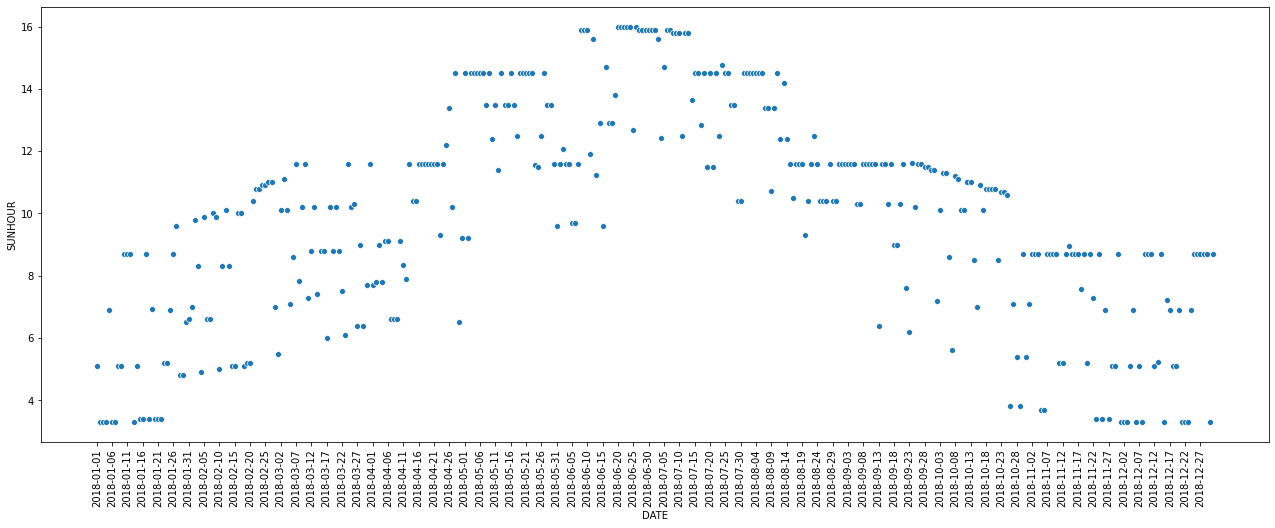

In [0]:
# Your code here
df2018complete=pd.merge(df_clean,df_nan,how='outer',sort=True)
fig = plt.figure(figsize = (22, 8))
plt.xticks(range(0, 365, 5), rotation = 90)
sns.scatterplot(df2018complete["DATE"],df2018complete["SUNHOUR"])

In [0]:
df2018complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in